# Pada contoh di notebook ini, kita menggunakan dataset MNIST untuk melatih CNN kita untuk persoalan klasifikasi gambar.

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8350 - loss: 0.5178 - val_accuracy: 0.9834 - val_loss: 0.0540
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9731 - loss: 0.0923 - val_accuracy: 0.9887 - val_loss: 0.0342
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9801 - loss: 0.0704 - val_accuracy: 0.9886 - val_loss: 0.0346
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9838 - loss: 0.0504 - val_accuracy: 0.9897 - val_loss: 0.0285
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9878 - loss: 0.0419 - val_accuracy: 0.9910 - val_loss: 0.0283
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9918 - val_loss: 0.0229
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9927 - val_loss: 0.0260
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9915 - loss: 0.0275 - val_accuracy: 0.

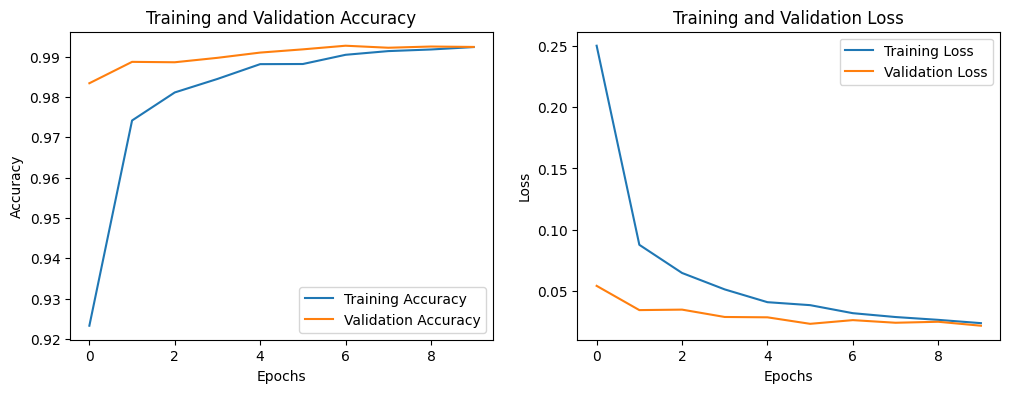

In [1]:
# Langkah 1: Mengimpor library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Langkah 2: Memuat dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing data
# Menambahkan dimensi channel (28x28 -> 28x28x1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# Normalisasi piksel ke rentang [0, 1]
x_train /= 255.0
x_test /= 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Langkah 3: Membuat model CNN
model = Sequential()

# Layer Convolutional pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Layer Convolutional kedua
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout untuk mencegah overfitting
model.add(Dense(10, activation='softmax'))  # Output layer dengan 10 kelas

# Langkah 4: Mengkompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# Langkah 5: Melatih model
history = model.fit(x_train, y_train,
                    epochs=10,  # Sesuaikan jumlah epoch sesuai kebutuhan
                    batch_size=64,
                    validation_data=(x_test, y_test))

# Langkah 6: Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

# Langkah 7: Visualisasi hasil pelatihan
# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


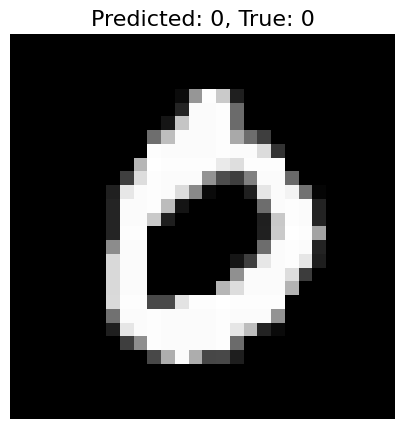

Predicted label: 0
True label: 0


In [7]:
import numpy as np

# Fungsi untuk menguji dan memvisualisasikan prediksi
def test_model(model, x_test, y_test, index):
    """
    Menguji model dengan satu gambar dari dataset MNIST.
    
    Args:
        model: Model CNN yang sudah dilatih.
        x_test: Data gambar test (28x28x1).
        y_test: Label test (one-hot encoded).
        index: Indeks gambar dalam dataset test untuk diuji.
    """
    # Ambil gambar dan label sebenarnya
    img = x_test[index]
    true_label = np.argmax(y_test[index])  # Label asli (bukan one-hot)

    # Prediksi model
    prediction = model.predict(np.expand_dims(img, axis=0))  # Perluas dimensi
    predicted_label = np.argmax(prediction)

    # Visualisasi hasil
    plt.figure(figsize=(5, 5))
    plt.imshow(img.squeeze(), cmap='gray')  # Hilangkan dimensi channel
    plt.title(f"Predicted: {predicted_label}, True: {true_label}", fontsize=16)
    plt.axis('off')
    plt.show()

    print(f"Predicted label: {predicted_label}")
    print(f"True label: {true_label}")

# Testing model dengan gambar ke-0, misalnya
test_model(model, x_test, y_test, index=3)
